<a href="https://colab.research.google.com/github/nadeeshafdo/google_colab/blob/main/Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('slr.csv')
data.head()

,chirps per second,temperature (F)
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [2]:
X = data[['chirps per second']]
y = data['temperature (F)']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)


In [4]:
print('Whole Data shape', data.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (15, 2)
X_train shape (11, 1)
X_test shape (4, 1)


In [5]:
from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()

In [6]:
slr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
#To see the simple linear regression parameters
slope = slr_model.coef_
y_intercept = slr_model.intercept_
print('Slope', slope)
print('Intercept', y_intercept)

Slope [3.5571068]
Intercept 20.405003967581408


In [8]:
y_pred_train = slr_model.predict(X_train)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

In [10]:
y_pred_test = slr_model.predict(X_test)

In [11]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Test R2 score', r2_test)
print('Test MSE', mse_test)

Test R2 score -0.9409079579988209
Test MSE 11.092282161560394


In [12]:
Comparison_df = pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred_test})
Comparison_df.to_csv(r'/content/Comparison_df.csv', index=True)
Comparison_df

,Actual,Predicted
9,83.300003,78.030137
11,82.599998,81.587244
0,88.599998,91.547140
13,83.500000,80.875820


In [13]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv('/content/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [16]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)
print('Whole Data shape', pima.shape)
print('X1_train shape', X1_train.shape)
print('X1_test shape', X1_test.shape)

Whole Data shape (768, 9)
X1_train shape (576, 6)
X1_test shape (192, 6)


In [17]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)
y_pred=logreg.predict(X1_test)

In [18]:
#To see the predicted values
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [19]:
Comparison_df = pd.DataFrame({'Actual Diabetic Diagnoses' : y_test,  'Predicted' : y_pred})
Comparison_df.to_csv(r'/content/Diagnoses_Comparison_df.csv', index=True)
Comparison_df

,Actual Diabetic Diagnoses,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
366,1,0
301,1,0
382,0,0
140,0,0


In [20]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

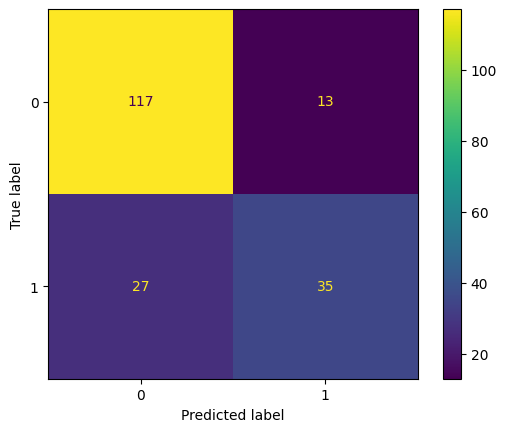

In [21]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

In [22]:
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.7916666666666666


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



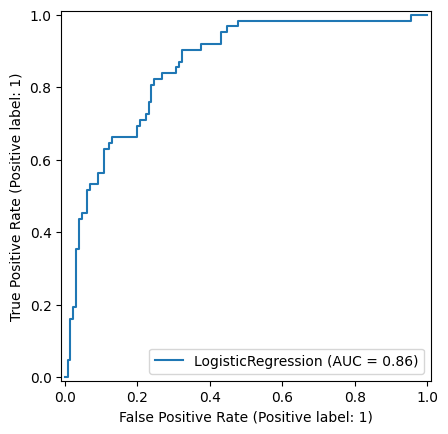

In [24]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)